## Analysis Selling Game console from 1976 - 2020
by ; Randipucha

This project analyzes game console sales from 1976 to 2020
The source of the data obtained comes from Kaggle, here is the link: https://www.kaggle.com/datasets/tayyarhussain/best-selling-game-consoles-of-all-time

### Big question 
#### in this dataset i have quetions to analyze selling game console, here we go

### 1. Which companies have high sales of game consoles?
### 2. What type of game console is the most produced?
### 3. What type of game console is the best-selling?

In [62]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [63]:
# load dataset
dataset = 'C:/Users/USER/Downloads/best-selling-game-consoles.csv'
df = pd.read_csv(dataset)
df

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
0,PlayStation 2,Home,Sony,2000,2013,155.00,Final sales are greater than 155 million
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02,NaN
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,NaN
3,Game Boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06,NaN
5,PlayStation 4,Home,Sony,2013,0,117.20,NaN
6,PlayStation,Home,Sony,1994,2006,102.49,NaN
7,Wii,Home,Nintendo,2006,2013,101.63,NaN
8,PlayStation 3,Home,Sony,2006,2017,87.40,Final sales are greater than 87.4 million
9,Xbox 360,Home,Microsoft,2005,2016,84.00,Final sales are greater than 84 million


In [64]:
# convert the type to object, this have error before. so i'll repair it with convert 
df['Type'] = df['Type'].astype(object)

# EDA

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Console Name          51 non-null     object 
 1   Type                  51 non-null     object 
 2   Company               51 non-null     object 
 3   Released Year         51 non-null     int64  
 4   Discontinuation Year  51 non-null     int64  
 5   Units sold (million)  51 non-null     float64
 6   Remarks               16 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.1+ KB


In [66]:
df.describe()

,Released Year,Discontinuation Year,Units sold (million)
count,51.000000,51.000000,51.000000
mean,1996.058824,1844.803922,35.549412
std,12.378064,543.657319,42.608844
min,1976.000000,0.000000,1.000000
25%,1987.500000,1992.000000,3.200000
50%,1994.000000,1998.000000,13.560000
75%,2004.500000,2011.500000,60.205000
max,2020.000000,2020.000000,155.000000


In [67]:
# check number data have missing value
df.isna().sum().sort_values()

Console Name             0
Type                     0
Company                  0
Released Year            0
Discontinuation Year     0
Units sold (million)     0
Remarks                 35
dtype: int64

"Remarks" column get the bigger point, so i decide to drop it.

### 1. Which companies have high sales of game consoles?
to Answer it, look the barplot in below

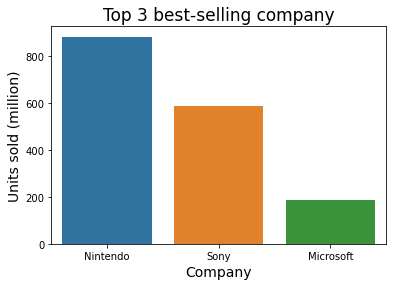

In [68]:
#find top 3 selling in each company
total_units_sold = df.groupby("Company")['Units sold (million)'].sum().reset_index()

top_3_company = total_units_sold.sort_values("Units sold (million)", ascending=False).head(3)

sns.barplot(data=top_3_company, x='Company', y='Units sold (million)')
plt.title('Top 3 best-selling company', fontsize=17)
plt.xlabel('Company', fontsize=14)
plt.ylabel("Units sold (million)", fontsize=14)
plt.show()

although sony company launch new console game in 2020 and now still available, nintendo's company still in higher selling position.
it means nintendo, have best satisfation to customer yeah, even a several console game in thats company is discontinued.

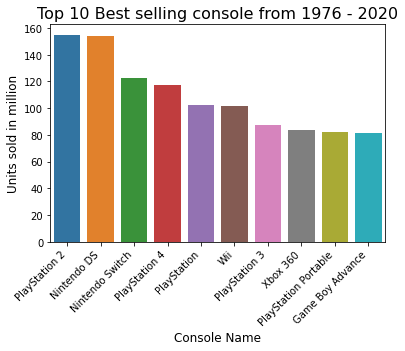

In [69]:
# top 10 best selling console
top10_console = df.sort_values('Units sold (million)',ascending=False).head(10)
    
sns.barplot(data=top10_console, x='Console Name', y='Units sold (million)')
plt.title("Top 10 Best selling console from 1976 - 2020", fontsize=16)
plt.xlabel("Console Name",fontsize=12)
plt.ylabel("Units sold in million", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

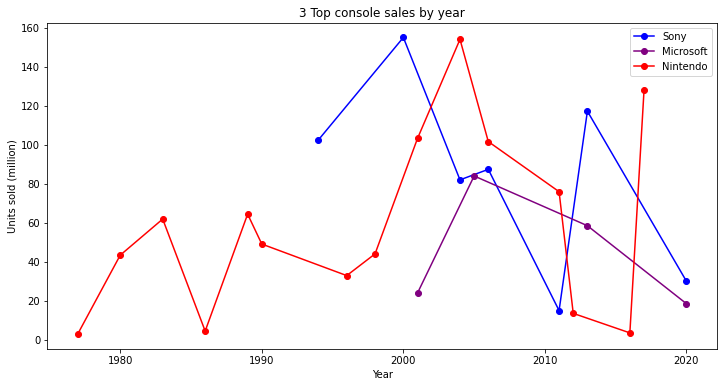

In [70]:
# in this section, show the line chart selling console game in year from 1976 to 2020 each 3 company 
sony_df = df[df['Company'] == 'Sony']
units_sold_sny = sony_df.groupby('Released Year')['Units sold (million)'].sum()
micro_df = df[df['Company'] == 'Microsoft']
units_sold_mcs = micro_df.groupby('Released Year')['Units sold (million)'].sum()
nintendo_df = df[df['Company'] == 'Nintendo']
units_sold_by_year = nintendo_df.groupby('Released Year')['Units sold (million)'].sum()

plt.figure(figsize=(12, 6))
plt.plot(units_sold_sny.index, units_sold_sny.values, '-o', color='blue')
plt.plot(units_sold_mcs.index, units_sold_mcs.values, '-o', color='purple')
plt.plot(units_sold_by_year.index, units_sold_by_year.values, '-o', color ='red')

plt.xlabel('Year')
plt.ylabel('Units sold (million)')
plt.title('3 Top console sales by year')
plt.legend(labels=['Sony','Microsoft','Nintendo'])
plt.show()


line chart above show that selling in nintendo's company have drastic increased selling in 1998's and declined again in the after year 2000's to 2015. Until 2020, sales of game consoles from the Nintendo company have increased rapidly.

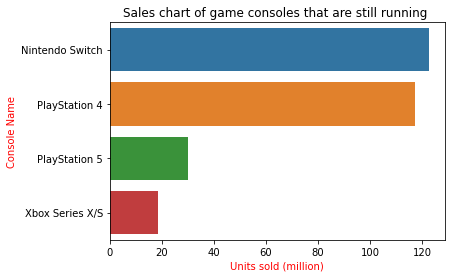

In [71]:
# To show selling console name was selling until now 
still_sell = df[['Console Name','Released Year','Discontinuation Year']]
still_sell = df.loc[[2,5,19,23]]
sns.barplot(data=still_sell, x='Units sold (million)', y='Console Name')
plt.title('Sales chart of game consoles that are still running ')
plt.xlabel('Units sold (million)', fontname='Sans-serif', color='red')
plt.ylabel('Console Name', fontname='Sans-serif', color='red')
plt.show()

### 2. What type of game console is the most produced?

In [72]:
Counts_type = df.groupby("Type")['Console Name'].count().reset_index()
Counts_type = Counts_type.head(3) 
most_type = Counts_type.sort_values('Type', ascending=False)
most_type

,Type,Console Name
2,Home,31
1,Handheld,12
0,Dedicated,4


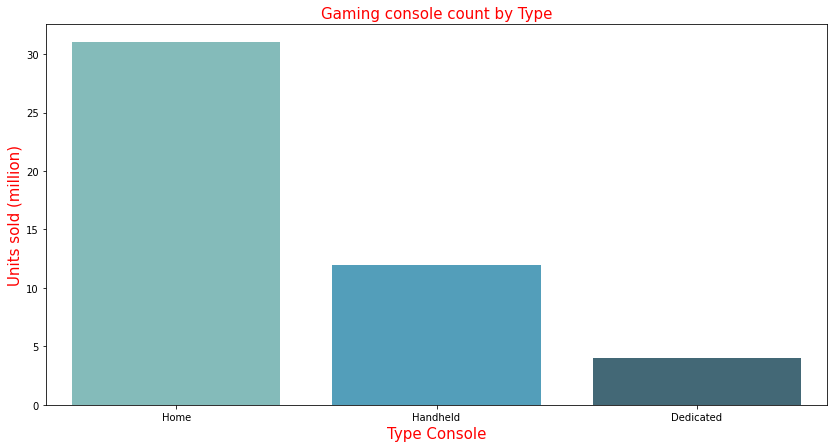

In [73]:
# show the barplot about 3 top best selling in type console
plt.figure(figsize=(14, 7))
ax3 = sns.barplot(data=most_type, x='Type', y='Console Name', palette='GnBu_d')
plt.xlabel('Type Console', fontdict = {'fontname':'sans-serif','color':'red','fontsize':'15'})
plt.ylabel('Units sold (million)', fontdict = {'fontname':'sans-serif','color':'red','fontsize':'15'})
plt.title('Gaming console count by Type', fontdict = {'fontname':'sans-serif','color':'red','fontsize':'15'})
plt.savefig('CountType', dpi=300);

Home is the most popular type console to people in the world, it is make you get connected to other from home

In [74]:
type_in_company = df.groupby("Company")['Type'].count().reset_index()
type_in_company 


,Company,Type
0,Atari,4
1,Bandai,1
2,Coleco,2
3,Magnavox/Philips,1
4,Mattel,1
5,Micro Genius,1
6,Microsoft,4
7,NEC,1
8,NEC/Hudson Soft[note 6],1
9,Nintendo,17


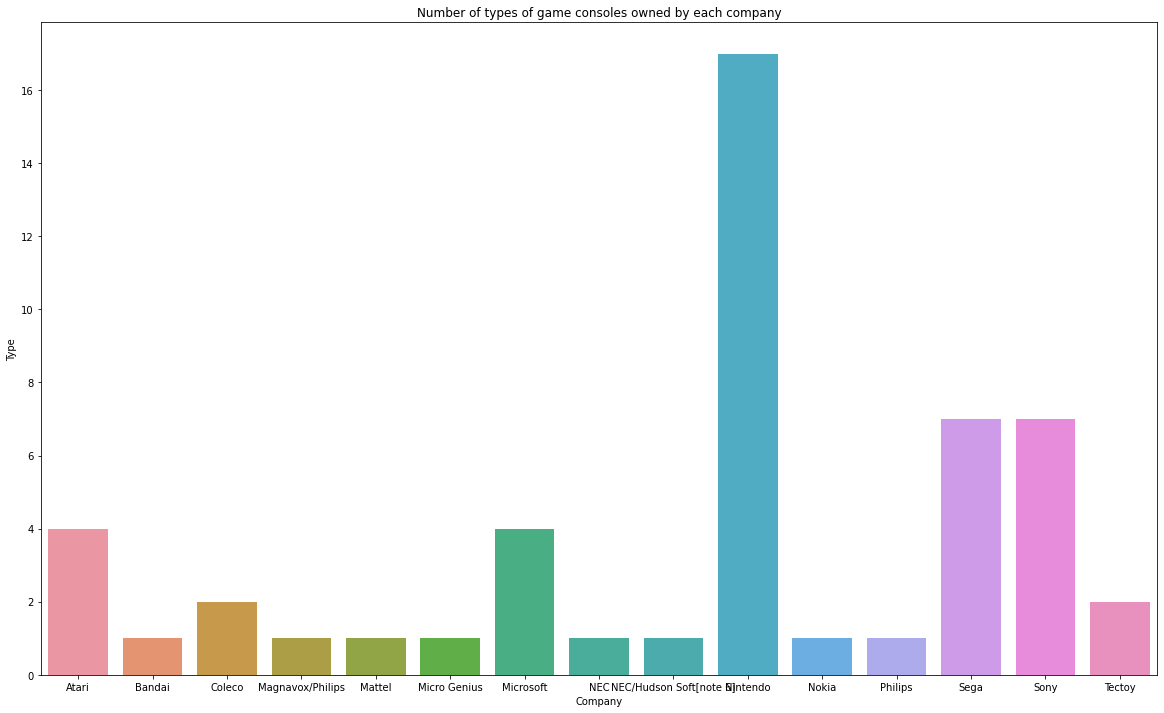

In [75]:
plt.figure(figsize=(20, 12))
sns.barplot(data=type_in_company, x='Company', y='Type')
plt.title("Number of types of game consoles owned by each company")
plt.xlabel('Company')
plt.ylabel('Type')
plt.show()

No doubt, Nintendo is a game console company with makers of various types of console games. No wonder our childhood was so memorable :)

### 3. What type of game console is the best-selling?
even nintendo have hybrid type with flexible game. home type is best option for gamer in the house. it sign to other company
to make console game with home type to make time with fun in the house:)

Text(0, 0.5, 'Units sold (million)')

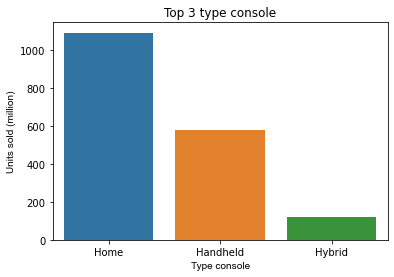

In [76]:
total_units_sold = df.groupby("Type")['Units sold (million)'].sum().reset_index()

top_3_Type = total_units_sold.sort_values("Units sold (million)", ascending=False).head(3)
sns.barplot(data=top_3_Type, x='Type', y='Units sold (million)')
plt.title("Top 3 type console")
plt.xlabel('Type console', fontname='Arial')
plt.ylabel('Units sold (million)', fontname='Arial')

In [77]:
Total =  df['Units sold (million)'].sum()
print(f'Total sales of game consoles from 1976 to 2020 were ${Total} Million')

Total sales of game consoles from 1976 to 2020 were $1813.02 Million


In [78]:
181302.1

181302.1